In [1]:
!pip install yfinance

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

class ratio:
    
    def __init__(self,tickers, start):
        self.data = yf.download(tickers, start=start)
        self.prices = self.data.Close
    
    def log_return(self):
        log_price = np.log(self.prices)
        log_return = (log_price[:-1] - log_price[1:]).to_numpy()
        return pd.Series(log_return, index=self.prices[1:].index)
    
    def returns(self):
        prices = self.prices.to_numpy()
        pre = prices[1:]
        returns = list()
        for i in range(len(pre)):
            gap = pre[i] - prices[i]
            returns.append(gap/prices[i])
        return pd.Series(returns, index=self.prices[1:].index)

In [4]:
hyun = ratio('005380.KS','2018-01-01')
gia = ratio('000270.KS','2018-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
pair = gia.prices-hyun.prices
pair = (pair - np.mean(pair))/np.std(pair)

<AxesSubplot:xlabel='Date'>

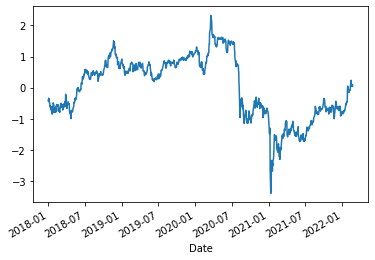

In [6]:
pair.plot()

<AxesSubplot:xlabel='Date'>

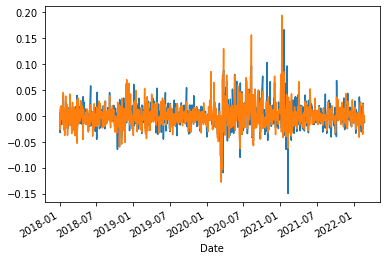

In [7]:
gia.returns().plot()
hyun.returns().plot()

In [110]:
print(np.cov(gia.returns(),hyun.returns()))

[[0.00055219 0.0003811 ]
 [0.0003811  0.00051934]]
